In [ ]:
Name : S.M.P.M. Ruvindi
Index No : 190535D

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


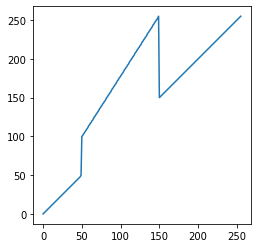

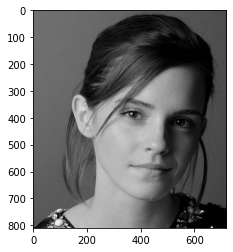

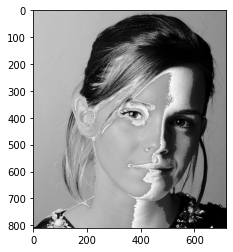

In [2]:
img=cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\images\emma_gray.jpg',cv.IMREAD_GRAYSCALE)
t1= np.linspace(0,50,50)
t2= np.linspace(50,100,0)
t3= np.linspace(100,255,100)
t4= np.linspace(255,150,0)
t5= np.linspace(150,255,106)
t = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256

img2 = cv.LUT(img,t)
newimg = cv.cvtColor(img,cv.COLOR_BGR2RGB)
newimg2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newimg)
fig3,ax3 = plt.subplots()
ax3.imshow(newimg2)



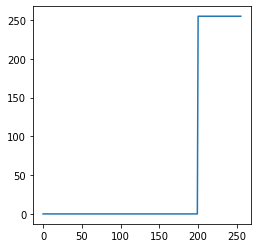

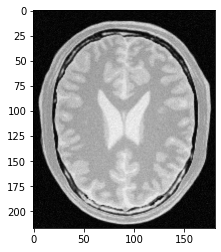

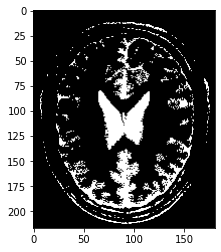

In [34]:
img=cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\images\brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
t1= np.linspace(0,0,200)
t2= np.linspace(0,255,0)
t3= np.linspace(255,255,56)
t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256

img2 = cv.LUT(img,t)
newimg = cv.cvtColor(img,cv.COLOR_BGR2RGB)
newimg2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newimg)
fig3,ax3 = plt.subplots()
ax3.imshow(newimg2)

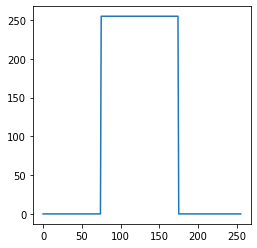

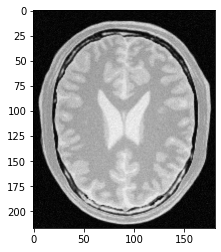

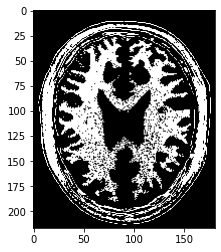

In [37]:
img=cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\images\brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
t1= np.linspace(0,0,75)
t2= np.linspace(0,255,0)
t5=np.linspace(255,255,100)
t3= np.linspace(255,0,0)
t4=np.linspace(0,0,81)
t = np.concatenate((t1,t2,t5,t3,t4),axis=0).astype(np.uint8)
fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256

img2 = cv.LUT(img,t)
newimg = cv.cvtColor(img,cv.COLOR_BGR2RGB)
newimg2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newimg)
fig3,ax3 = plt.subplots()
ax3.imshow(newimg2)

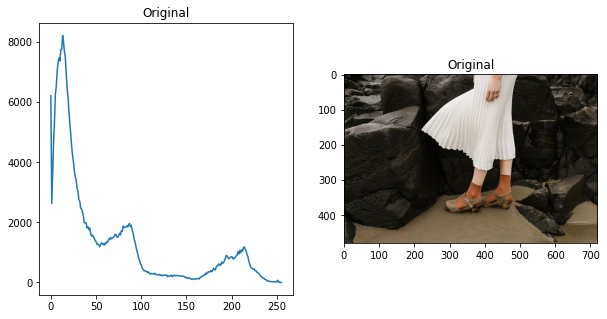

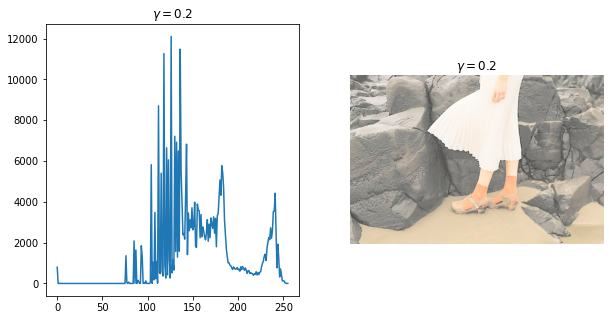

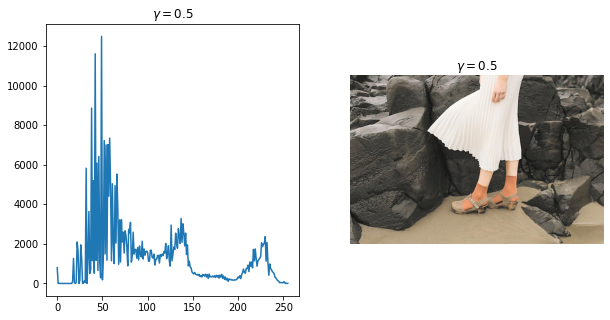

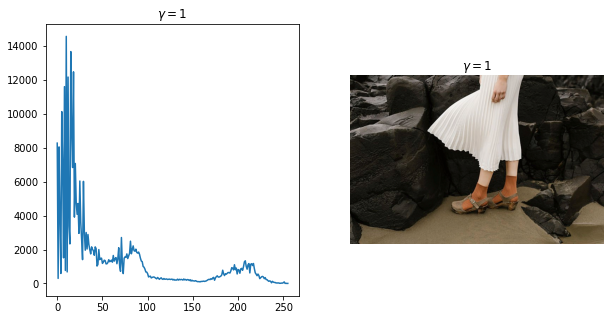

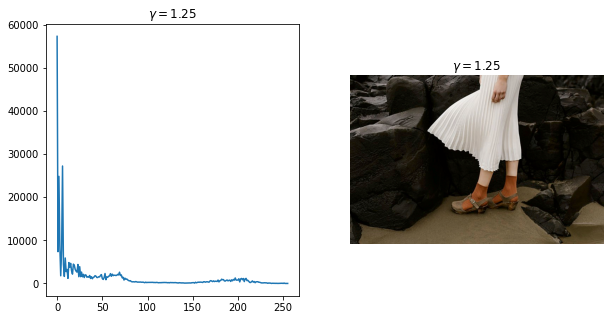

In [19]:
f = cv.imread(r"C:\Users\ASUS\Documents\coding\image processing\images\highlights_and_shadows.jpg", cv.IMREAD_COLOR)
assert f is not None
lab = cv.cvtColor(f, cv.COLOR_BGR2Lab)
newf = cv.cvtColor(f,cv.COLOR_BGR2RGB)
l, a, b = cv.split(lab)
gamma = [0.2 , 0.5, 1, 1.25]
hist = cv.calcHist([f], [0], None, [256], [0,256])
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].plot(hist)
ax[0].set_title("Original")
ax[1].imshow(newf)
ax[1].set_title("Original")



for i in range (4):
    t = np.array([(p/255.0)**gamma[i]*(255.0) for p in l]).astype(np.uint8)
    newlab = cv.merge([t,a,b])
    newf = cv.cvtColor(newlab, cv.COLOR_LAB2BGR)
    newhist= cv.calcHist([newf], [0], None, [256], [0,256])

    fig, ax = plt.subplots(1,2, figsize = (10,5))
    ax[0].plot(newhist)
    ax[0].set_title("$\gamma = $"+ str(gamma[i]))

    img = cv.cvtColor(newf, cv.COLOR_BGR2RGB)
    
    ax[1].set_title("$\gamma = $"+ str(gamma[i]))
    ax[1].imshow(img)
    ax[1].axis('off')
    plt.show()

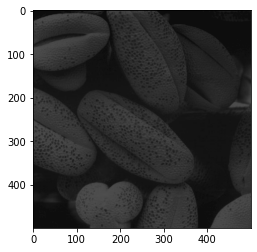

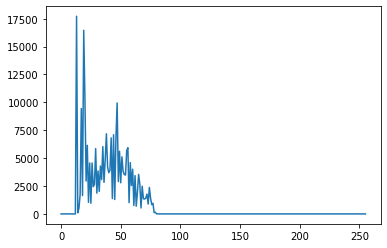

In [18]:
f=cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\images\shells.png',cv.IMREAD_GRAYSCALE)
assert f is not None
newf = cv.cvtColor(f,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newf)

hist=np.zeros(256)
for i in f:
    for j in i:
        hist[j]+=1
fig,ax=plt.subplots()
ax.plot(hist)


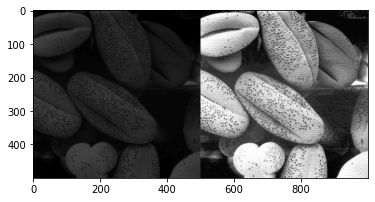

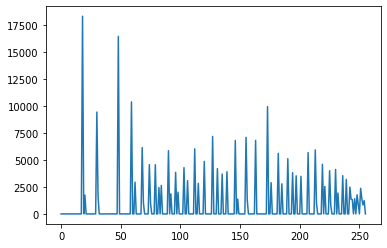

In [19]:
eq=np.zeros(256,dtype=int)
MN=len(f)*len(f[0])
cumsum=0
for z in range(256):
    cumsum+=hist[z]
    eq[z]+=int((255/MN)*cumsum)
f2=cv.LUT(f,eq)
eqhist=np.zeros(256)
for i in f2:
    for j in i:
        eqhist[j]+=1

f2=f2.astype(np.float32)
newf2 = cv.cvtColor(f2,cv.COLOR_BGR2RGB)
#fig1,ax1 = plt.subplots()
#ax1.imshow(newf2,cmap='gray',vmin=0,vmax=0)
#plt.show()
res = np.hstack ( ( f ,f2 ) )
plt.imshow(res, cmap='gray' )
fig2,ax2=plt.subplots()
ax2.plot(eqhist)




Text(0.5, 1.0, 'zoomed')

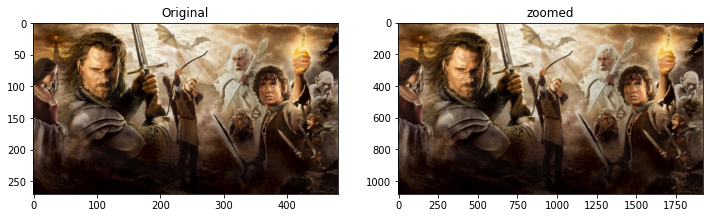

In [6]:
im=cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\images\a1q5images\im01small.png', cv.IMREAD_COLOR)
s=4
rows=im.shape[0]*s
cols=im.shape[1]*s
zoomed=np.zeros((rows,cols,3),dtype=im.dtype)
for i in range(rows):
    for j in range(cols):
        for k in range(3):
            zoomed[i][j][k]=im[int(i/s)][int(j/s)][k]
newim = cv.cvtColor(im,cv.COLOR_BGR2RGB)
fig,ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(newim)
ax[0].set_title("Original")
newZ = cv.cvtColor(zoomed,cv.COLOR_BGR2RGB)
ax[1].imshow(newZ)
ax[1].set_title("zoomed")



Text(0.5, 1.0, 'zoomed')

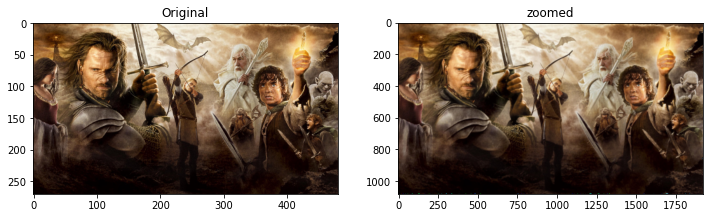

In [9]:
im=cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\images\a1q5images\im01small.png', cv.IMREAD_COLOR)
s=4
rows=im.shape[0]*s
cols=im.shape[1]*s
zoomed=np.zeros((rows,cols,3),dtype=im.dtype)
for i in range (0,rows):
    for j in range (0,cols):
        for k in range (3): 
            ii = i/s
            jj = j/s

            P = min(max(round(ii-0.5),0),im.shape[0]-2)
            Q = min(max(round(jj-0.5),0),im.shape[1]-2)


            rat1 = ii - P
            rat2 = jj - Q

            p00 = im[P][Q][k]
            p01 = im[P][Q+1][k]
            p10 = im[P+1][Q][k]
            p11 = im[P+1][Q+1][k]

            a = p00*(1-rat1)+ p10*(rat1)
            b= p01*(1-rat1)+ p11*(rat1)
            zoomed[i][j][k] = round((a)*(1-rat2) + (b)*(rat2))
newim = cv.cvtColor(im,cv.COLOR_BGR2RGB)
fig,ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(newim)
ax[0].set_title("Original")
newZ = cv.cvtColor(zoomed,cv.COLOR_BGR2RGB)
ax[1].imshow(newZ)
ax[1].set_title("zoomed")  

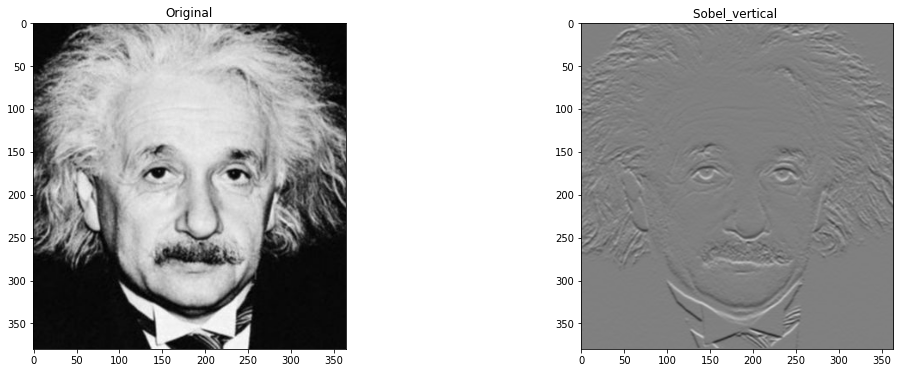

In [14]:
f=cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\images\einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None
sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
f_x=cv.filter2D(f,-1,sobel_v)
sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)
f_y=cv.filter2D(f,-1,sobel_h)
grad_mag=np.sqrt(f_x**2+f_y**2)
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].imshow(f, cmap='gray',vmin=0, vmax=255)
ax[0].set_title("Original")

ax[1].imshow(f_x, cmap='gray',vmin=-1020, vmax=1020)
ax[1].set_title(r"Sobel_vertical ")

plt.show()

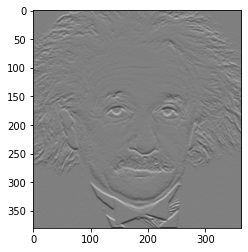

In [15]:
f=cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\images\einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None
sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
rows=f.shape[0]
cols=f.shape[1]
f_x2=np.zeros((rows,cols))
for i in range(rows):
    for j in range(cols):
        for u in range(3):
            for v in range(3):
                if not((i==0 and u==0) or (i==rows-1 and u==2) or (j==0 and v==0) or (j==cols-1 and v==2)):
                    f_x2[i,j]+=sobel_v[u,v]*f[i+u-1,j+v-1]
fig1,ax1 = plt.subplots()
ax1.imshow(f_x2,cmap='gray',vmin=-1020, vmax=1020)

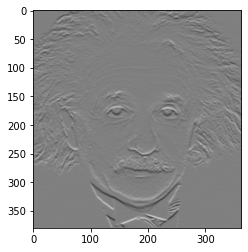

In [17]:
f=cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\images\einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None
a=np.array([1,2,1],dtype=np.float32)
b=np.array([1,0,-1],dtype=np.float32)

fnew = cv.sepFilter2D(f, -1, a, b)

fig1,ax1 = plt.subplots()
ax1.imshow(fnew,cmap='gray',vmin=-1020, vmax=1020)

(-0.5, 560.5, 840.5, -0.5)

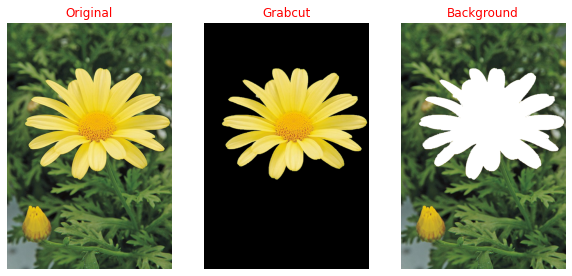

In [26]:
img = cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\images\daisy.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,120,550,500)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
mask3 = (mask2 * 255).astype(np.uint8)
img2 = img*mask2[:,:,np.newaxis]
newimg=cv.cvtColor(img,cv.COLOR_BGR2RGB)
newimg2=cv.cvtColor(img2,cv.COLOR_BGR2RGB)
background= cv.cvtColor(mask3, cv.COLOR_BGR2RGB)+(newimg - newimg2)

fig,ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(newimg)
ax[0].set_title('Original', color = 'r')
ax[0].axis('off')
ax[1].imshow(newimg2)
ax[1].set_title('Grabcut', color = 'r')
ax[1].axis('off')
ax[2].imshow(background)
ax[2].set_title('Background', color = 'r')
ax[2].axis('off')

(-0.5, 560.5, 840.5, -0.5)

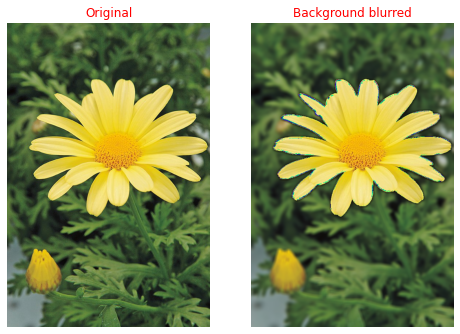

In [33]:
img = cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\images\daisy.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,120,550,500)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
mask3 = (mask2 * 255).astype(np.uint8)
img2 = img*mask2[:,:,np.newaxis]
newimg=cv.cvtColor(img,cv.COLOR_BGR2RGB)
newimg2=cv.cvtColor(img2,cv.COLOR_BGR2RGB)
#background= cv.cvtColor(mask3, cv.COLOR_BGR2RGB)+(newimg - newimg2)
blurimg=cv.blur(newimg-newimg2,(10,10))
backblur=blurimg+newimg2
fig,ax = plt.subplots(1,2,figsize=(8,8))
ax[0].imshow(newimg)
ax[0].set_title('Original', color = 'r')
ax[0].axis('off')
ax[1].imshow(backblur)
ax[1].set_title('Background blurred', color = 'r')
ax[1].axis('off')
